# LIST NR 1: Python and NumPy exercises

In [ ]:
import numpy as np

If you are new to Python: most questions can be answered after few minuts of "googling". You may also want to check simple built-in help, e.g., `help(np)` or `help(np.random)`

## Q1.0 (warm-up)

Create:
* a=[1,2,...,100] (vector consiting of integer numbers from 1 to 100)
* b=[1,3,...,99]
* c=$[-\pi, -0.99\pi,...,0.99\pi, \pi]$
* A = matrix of size $10\times 10$:
$$\left[\begin{array}{llll}
1 & 2 & \ldots & 9 & 10\\
11 & 12 & \ldots & 19 & 20\\
\vdots \\
91 & 92 & \ldots & 99 & 100
\end{array}\right]$$
* B = upper-triangular matrix with ons on and above diagonal
* C = matrix of size $2\times 100$, where first row has elements $d_{1,i} = 1+2+\ldots + i$ and second $d_{2,i}=i!$
* D = matrix of size $100\times 100$ such that D[i,j]=1 if i divides j, 0 otherwise

In [ ]:
import math
np.random.seed(0)
a=[i for i in range (1,101)]
b=[i for i in range (1,101) if i%2==1]
c = [(np.pi*i) / 100 for i in range(-100, 101)]
A = np.zeros((10, 10))
for i in range(10):
  for j in range(10):
    A[i][j]=i*10+j+1



D=np.zeros((100,100))
for i in range(100):
  for j in range(100):
    if ((j+1)%(i+1)==0):
      a=1
    else:
      a=0
    D[i][j]=a


print(D)



[[1. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Q1.1

In [ ]:
a=np.arange(1,101)
b=np.arange(1,100,2)
print(b)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


1000 numbers for uniform distribution $U(-2,5)$

In [2]:
np.random.seed(0)
x = np.random.uniform(-2,5, size=1000)

Standard devitaion of $n$ numbers $x_1,\ldots,x_n$
$$\sigma=\sqrt{{1\over n}\sum_{i=1}^n (x_i-\hat{x})^2}, \quad \textrm{where } \hat{x}={1\over n}\sum_{i=1}^n x_i$$
built-in function to compute it: `np.std(x)`

In [3]:
print(np.std(x))

def my_std(data):
    mean = np.mean(data)
    squared_diff = (data - mean) ** 2
    mean_squared_diff = np.mean(squared_diff)
    std = np.sqrt(mean_squared_diff)
    return std

print (my_std(x)==np.std(x))

2.0341918909242707
True


* a) compute `std` using only `np.mean`, `np.sqrt` and `**2`
* b) Make  a histogram of `x` with 50 bins. Compare it with density plot. Reapeat for 10k numbers
* c) Sample 1000 numbers from normal distribution with $\mu=3, \sigma^2=9$. Make their histogram with 50 bins. Compare with density plot. Repeat for 10k numbers
* d) Sample 1000 points $(x,y)$ where $x$ are sampled from $N(4,4)$ and $y$ are sampled from $N(5,1)$. Make a scatter plot of the points. Repeat for 10k points.
* e) Using data from d) estimate $P(X<Y)$ where X has distribution $N(4,4)$ and $Y$ has distribution $N(5,1)$. Can you provide exact answer? (computed based on probability/statistics)

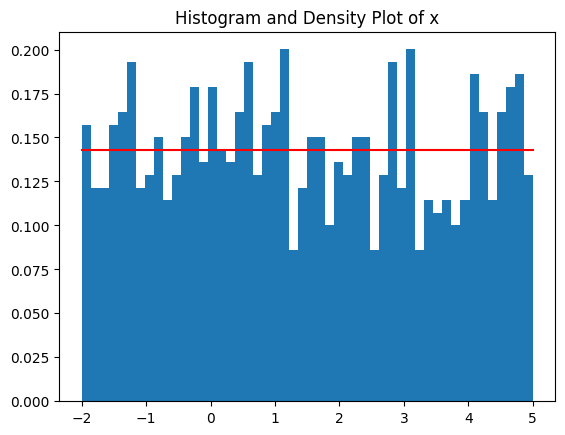

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def uniform_density(x):
    return np.where((x >= -2) & (x <= 5), 1/7, 0)

plt.hist(x, bins=50, density=True)

x_values = np.linspace(-2, 5, 1000)
y_values = uniform_density(x_values)
plt.plot(x_values, y_values, color='red')


plt.title('Histogram and Density Plot of x')


plt.show()


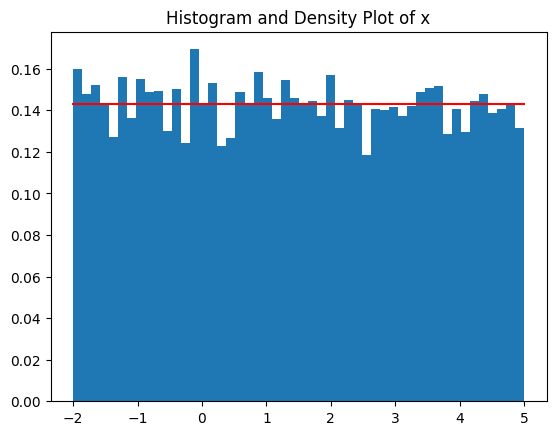

In [5]:
x = np.random.uniform(-2,5, size=10000)

plt.hist(x, bins=50, density=True)

x_values = np.linspace(-2, 5, 1000)
y_values = uniform_density(x_values)
plt.plot(x_values, y_values, color='red')


plt.title('Histogram and Density Plot of x')

plt.show()


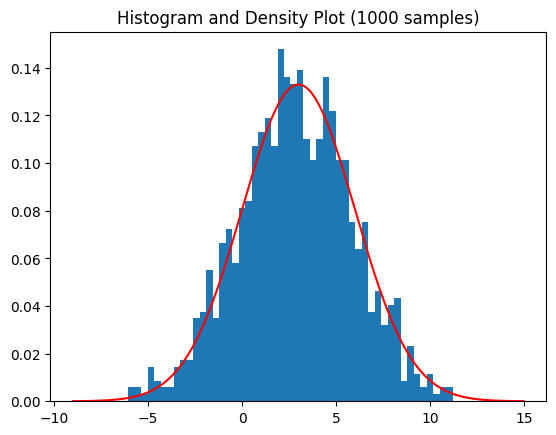

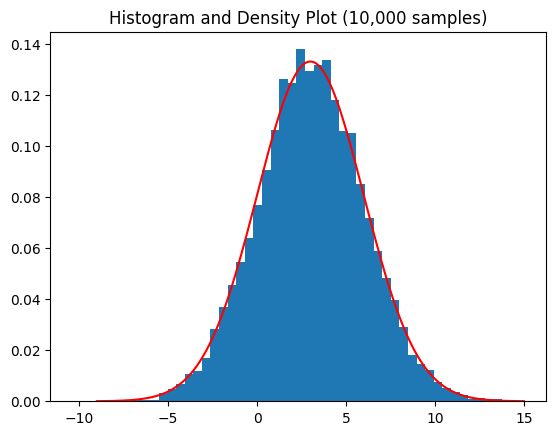

In [6]:

def normal_density(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

mu=3
sigma=3

sample_1000 = np.random.normal(mu, sigma, size=1000)
sample_10000 = np.random.normal(mu, sigma, size=10000)

# Plot for 1000 samples
plt.hist(sample_1000, bins=50, density=True)
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = normal_density(x_values, mu, sigma)
plt.plot(x_values, y_values, color='red')
plt.title('Histogram and Density Plot (1000 samples)')
plt.show()

# Plot for 10000 samples
plt.hist(sample_10000, bins=50, density=True)
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = normal_density(x_values, mu, sigma)
plt.plot(x_values, y_values, color='red')
plt.title('Histogram and Density Plot (10,000 samples)')
plt.show()


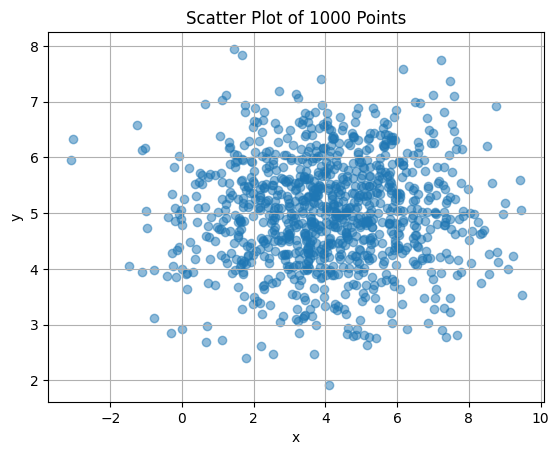

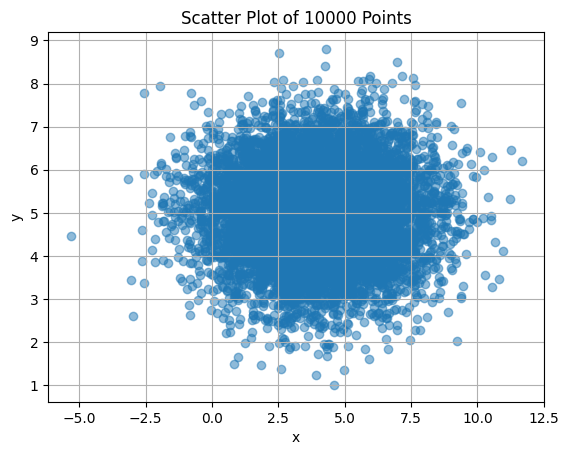

In [7]:
import numpy as np
import matplotlib.pyplot as plt


mu_x, sigma_x = 4, 2
mu_y, sigma_y = 5, 1


points_1000 = np.random.normal(mu_x, sigma_x, size=1000), np.random.normal(mu_y, sigma_y, size=1000)

points_10000 = np.random.normal(mu_x, sigma_x, size=10000), np.random.normal(mu_y, sigma_y, size=10000)


plt.scatter(points_1000[0], points_1000[1], alpha=0.5)
plt.title('Scatter Plot of 1000 Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


plt.scatter(points_10000[0], points_10000[1], alpha=0.5)
plt.title('Scatter Plot of 10000 Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [13]:
import scipy.stats as stats


points_1000 = np.vstack((np.random.normal(mu_x, sigma_x, size=1000), np.random.normal(mu_y, sigma_y, size=1000)))

points_10000 = np.vstack((np.random.normal(mu_x, sigma_x, size=10000), np.random.normal(mu_y, sigma_y, size=10000)))

def calculate_probability(points):
    #points=np.array(points)
    N = points.shape[1]
    #cnt = sum(points[0][i] < points[1][i] for i in range(N))
    cnt = np.sum(points[0,:] < points[1,:])
    return cnt / N


sample_sizes = [1000, 10000]

probabilities = [calculate_probability(points_1000), calculate_probability(points_10000)]
for N, prob in zip(sample_sizes, probabilities):
    print(f"P(X < Y) for {N} samples: {prob:.4f}")


mu_diff = mu_x - mu_y
sigma_diff = np.sqrt(sigma_x**2 + sigma_y**2)
p = stats.norm.cdf(0, loc=mu_diff, scale=sigma_diff)
print("P(X < Y) using N (mu_1 + mu_2, sigma_x**2 + sigma_y**2):", p)


P(X < Y) for 1000 samples: 0.6440
P(X < Y) for 10000 samples: 0.6713
P(X < Y) using N (mu_1 + mu_2, sigma_x**2 + sigma_y**2): 0.6726395769907115


# Q1.2

In [ ]:
#Random vectors v,w,u of dimension d
np.random.seed(0)
d=100
v=np.random.uniform(-10,10,size=d)
w=np.random.uniform(-5,5,size=d)
u=np.random.uniform(0,10,size=d)

n=200
#X = random (standard normal) matrix of size d x n
X=np.random.normal(0,1,size=(d,n))

* a) compute lengths of vectors; weighted average of `v` weighted by weights `w`; dot product of `v` and `u`
* b) For $\mathbf{X}$ of size $d\times n$ (think: $n$ vectors from $\mathbb{R}^d$) compute:
** lengths of all $n$ vectors
** weighted average of all $n$ vectors weighted by weights `w` (result: vector of length $n$ with these averages)

In [ ]:
#lengths of vectors
length_v = np.linalg.norm(v)
length_w = np.linalg.norm(w)
length_u = np.linalg.norm(u)

#weighted average of v weighted by weights w
weighted_avg_v = np.dot(v, w) / np.sum(w)

#dot product of v and u
dot_product_v_u = np.dot(v, u)

ls=[]
weighted_avgs=[]
for i in range(X.shape[1]):
  vec=X[:, i]
  ls.append(len(vec))
  weighted_avgs.append(np.dot(vec,w)/np.sum(w))

print(ls)
print(len(weighted_avgs))




[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

## Q1.3

For making plot use `matplotlib`

In [ ]:
import matplotlib.pyplot as plt

* a) make a 2d plot containing 10 points: $(3,5), (4,6), (7,7), (8,11), (10,12), (11,14), (12, 10), (16,15), (18, 19) , (20, 21)$
* b) add to the plot a line $y=0.6x+5$
* c) for each data $(x_i,y_i)$ point compute its distance to the line $y=0.6x+5$ defined simply as $dist((x_i,y_i), line)=(0.6x_i+5 - y_i)^2$
* d) try to  find $a,b$ such that sum of distances of all points from line $y=ax+b$ is smaller

Sum of distances to y = 0.6x + 5: 49.48
Optimal parameters (a, b): 0.8952186795595095 2.2421163960514585


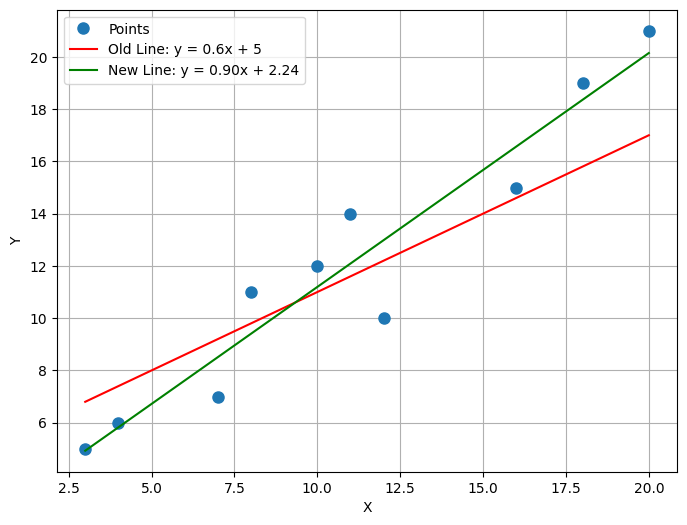

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

points = [(3, 5), (4, 6), (7, 7), (8, 11), (10, 12), (11, 14), (12, 10), (16, 15), (18, 19), (20, 21)]

def line(x):
    return 0.6 * x + 5

def distance(point):
    x, y = point
    return (0.6 * x + 5 - y) ** 2


sum_distances = sum(distance(point) for point in points)

print("Sum of distances to y = 0.6x + 5:", sum_distances)

def sum_of_distances(params):
    a, b = params
    return sum((a * x + b - y) ** 2 for x, y in points)

initial_guess = [0, 0]
result = minimize(sum_of_distances, initial_guess)
a_optimal, b_optimal = result.x

print("Optimal parameters (a, b):", a_optimal, b_optimal)


x_values = np.linspace(min(point[0] for point in points), max(point[0] for point in points), 100)

# y values for the old line y = 0.6x + 5
y_values_old = line(x_values)

# y values for the new line
def new_line(x, a, b):
    return a * x + b

y_values_new = new_line(x_values, a_optimal, b_optimal)


plt.figure(figsize=(8, 6))
plt.plot([point[0] for point in points], [point[1] for point in points], 'o', markersize=8, label='Points')


plt.plot(x_values, y_values_old, '-', label='Old Line: y = 0.6x + 5', color='red')

plt.plot(x_values, y_values_new, '-', label=f'New Line: y = {a_optimal:.2f}x + {b_optimal:.2f}', color='green')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Parameters (a, b) 0.8952187182095626 2.2421159715157684


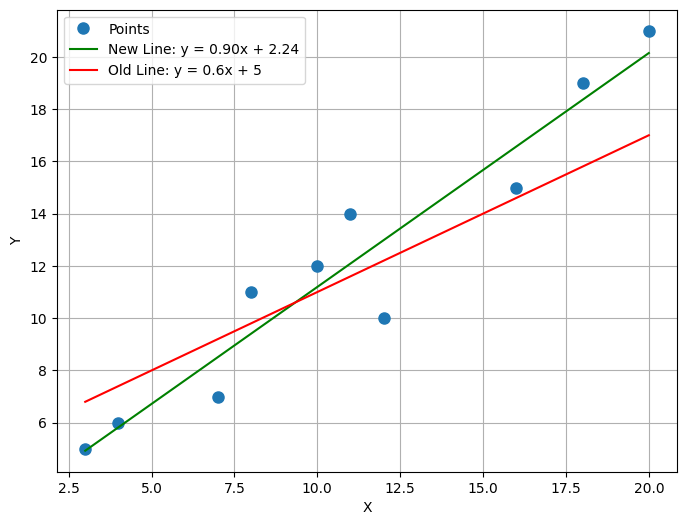

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

points = [(3, 5), (4, 6), (7, 7), (8, 11), (10, 12), (11, 14), (12, 10), (16, 15), (18, 19), (20, 21)]

sum_x = sum(point[0] for point in points)
sum_y = sum(point[1] for point in points)

sum_x_squared = sum(point[0] ** 2 for point in points)

sum_xy = sum(point[0] * point[1] for point in points)


n = len(points)
a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
b = (sum_y - a * sum_x) / n

print("Parameters (a, b)", a, b)

def line(x, a, b):
    return a * x + b


x_line = np.linspace(min(point[0] for point in points), max(point[0] for point in points), 100)

y_line = line(x_line, a, b)
old_a = 0.6
old_b = 5
old_line = line(x_line, old_a, old_b)


plt.figure(figsize=(8, 6))
plt.plot([point[0] for point in points], [point[1] for point in points], 'o', markersize=8, label='Points')
plt.plot(x_line, y_line, '-', label=f'New Line: y = {a:.2f}x + {b:.2f}', color='green')
plt.plot(x_line, old_line, '-', label=f'Old Line: y = {old_a}x + {old_b}', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()


## Q1.4 (bonus)

* Read about  [Monte Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). Simulate the game show 10k times and estimate the probabilities of winning in using two strategies:
** do not change intially chosen door
** always change intially chosen door

In [ ]:
import numpy as np

def monty_hall_simulation(strategy, num_trials=10000):
    wins = 0

    for _ in range(num_trials):
        prize_door = np.random.randint(3)

        player_choice = np.random.randint(3)

        remaining_doors = [door for door in range(3) if door != player_choice and door != prize_door]
        door_revealed = np.random.choice(remaining_doors)

        if strategy == "stay":
            final_choice = player_choice
        elif strategy == "switch":
            final_choice = next(door for door in range(3) if door != player_choice and door != door_revealed)

        if final_choice == prize_door:
            wins += 1

    return wins / num_trials

prob_win_stay = monty_hall_simulation("stay")
prob_win_switch = monty_hall_simulation("switch")

print("Probability of winning if staying with initial choice:", prob_win_stay)
print("Probability of winning if always switching initial choice:", prob_win_switch)


Probability of winning if staying with initial choice: 0.3393
Probability of winning if always switching initial choice: 0.6672
